### Importing required libraries 

In [4]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Loading the data to pandas dataframe 

In [5]:
# getting the data from sklearn datasets
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)

Read more about the dataset here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

### Checking out the dataset 

In [7]:
# displays the first five rows in the data
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# gives information about the data
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# information on the spread of the data
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# number of rows and columns in the data
df_boston.shape

(506, 14)

In [12]:
# getting the X and y values
X = df_boston.drop('target', axis=1)
y = df_boston['target']

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

### Splitting the data to a train and test set 

In [15]:
# using 80% to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [16]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


### Building a Linear Regression model 

In [17]:
# instantiating the model
model = linear_model.LinearRegression()

In [18]:
#training the model on the train set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#making predictions with the model baesed on the test data
y_pred = model.predict(X_test)
y_pred

array([20.69655113, 21.22881804, 30.03765889,  0.7636859 , 13.19792008,
       21.31844072, 11.01076869, 19.72200226, 22.68343029, 37.45130424,
       25.17414964, 15.81974019, 13.30653892, 24.52687119, 17.23488323,
       25.79460316, 27.29685735, 26.58631419, 18.07877237, 26.6707837 ,
       32.12803956, 23.14025041, 24.71857988, 11.65858954, 20.48599786,
       16.15079496, 17.97139148, 27.31109271, 18.58737458, 18.88699921,
       27.59810256, 16.97475127, 35.96143977, 23.09602886, 34.4188012 ,
       16.40165371, 23.18749426, 22.50095651, 16.27061146, 14.68629157,
       24.8747767 , 19.68009167, 18.72475191, 14.58302391, 20.73269868,
       19.58669366, 21.2606553 , 22.51074572, 29.34254481, 25.19520564,
       40.65787761, 23.18316713, 30.01273761, 12.05166984, 21.1613112 ,
       17.52405617, 10.89075115, 33.08532809, 24.33775355, 28.36035351,
       34.70015918, 31.68716939, 16.58684819, 20.80117425, 20.94382658,
       13.28415156, 19.83836806, 36.04019321, 20.06353404, 24.16

### Checking Model Performance 

In [20]:
# getting the model cocefficients
model.coef_

array([-1.11568568e-01,  4.41014131e-02,  3.28953833e-02,  2.55087675e+00,
       -1.72765279e+01,  3.80934627e+00,  5.47479583e-03, -1.47851274e+00,
        3.33525886e-01, -1.44240979e-02, -9.19858676e-01,  9.92550731e-03,
       -5.39271604e-01])

In [21]:
# getting the model interept
model.intercept_

35.86301447775622

#### Remember y = mx + c

In [22]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


target = -1.11*(CRIM) + 4.41*(ZN) + 3.28*(INDUS) + ....... + 35.86

In [23]:
# model's error rate
mean_squared_error(y_test, y_pred)

19.33064916766937

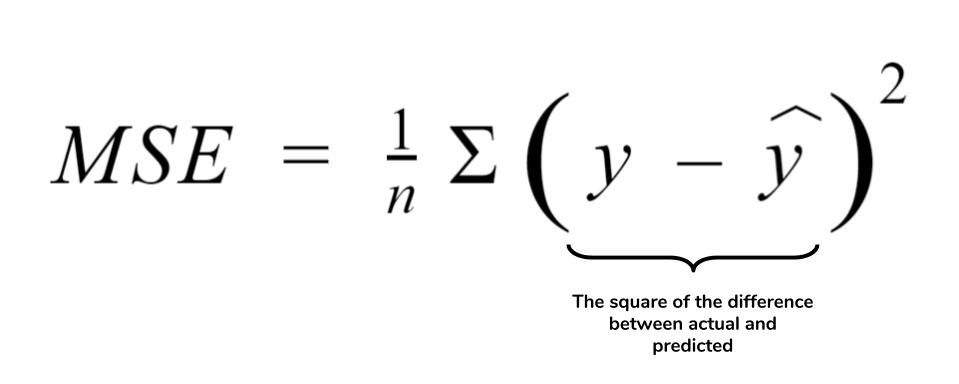

In [24]:
# Coefficient of Determination
r2_score(y_test, y_pred)

0.7540841584402526

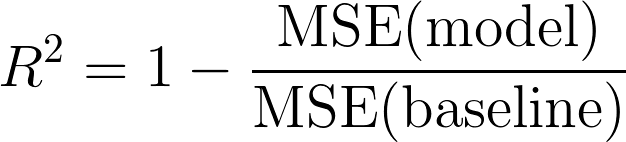